# Maps

files neede = ('cb_2017_us_state_5m.shp', 'cb_2017_us_county_5m/cb_2017_us_county_5m.shp', 'results.csv')

Okay, we now know enough about figures and pandas to get a map off the ground. 

We will use the geopandas package to plot our maps. Maps are really quite complicated. We are trying to project a spherical surface onto a flat figure, which is inherently a complicated endeavor. Luckily, geopandas will handle most of it for us. 

In [1]:
import pandas as pd                         # pandas for data management
import geopandas                            # geopandas for maps work
from shapely.geometry import Point          # shapely handles the coordinate references for plotting shapes
import matplotlib.pyplot as plt             # matplotlib for plotting details

### Setting up the GeoDataFrame
Let's start by plotting some cities. The DataFrame below holds longitudes and latitudes of major South American cities. Our goal is to turn them into something we can plot---in this case, a GeoDataFrame.

In [3]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})
df.head()

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


We need tuples of coordinates to map the cities. We zip together lat and long to create the tuples and store them in a column named 'Coordinates'.

In [5]:
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df.head()

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,"(-58.66, -34.58)"
1,Brasilia,Brazil,-15.78,-47.91,"(-47.91, -15.78)"
2,Santiago,Chile,-33.45,-70.66,"(-70.66, -33.45)"
3,Bogota,Colombia,4.60,-74.08,"(-74.08, 4.6)"
4,Caracas,Venezuela,10.48,-66.86,"(-66.86, 10.48)"


Next, we turn the tuple into a [Point](http://toblerity.org/shapely/manual.html#spatial-data-model) object. Notice that we imported Point from Shapely in the first code cell. We use the `apply()` method of DataFrame to apply the Point function to each row of the Coordinates column.

In [6]:
df['Coordinates'] = df['Coordinates'].apply(Point)
df.head()

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


We now have a column of Point objects. 

We turn the DataFrame into a **GeoDataFrame**, which is a data structure that understands how to plot maps. The **important** part here is that we specify the column that contains the `geometery` data. From the [docs](http://geopandas.org/data_structures.html):

> The most important property of a GeoDataFrame is that it always has one GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrame’s “geometry”. When a spatial method is applied to a GeoDataFrame (or a spatial attribute like area is called), this commands will always act on the “geometry” column.

In our case, the geometry data are the points in the 'Coordinates' column. 

In [7]:
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')
gdf.head()

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


In [16]:
# Doesn't look different than a vanilla DataFrame...let's make sure we have what we want.
print('gdf is of type:', type(gdf))

# And how can we tell which column is the geometry column?
print('\nThe geometry column is:', gdf.geometry.name)

gdf is of type: <class 'geopandas.geodataframe.GeoDataFrame'>

The geometry column is: Coordinates


### Plotting the map
Okay, we have our points in the GeoDataFrame. Let's plot the locations on a map. We proceed in three steps:
1. Get the map
2. Plot the map
3. Plot the points on the map


### 1. Get the map
[Natural Earth](https://www.naturalearthdata.com/) is the name of the organiztion that compiled the map data. The file provides the outlines of countries over which we will plot the locations of the cities in our GeoDataFrame. Geopandas comes with this data bundled into it, so we do not have to go get it. Thanks geopandas! 

In [9]:
# Step 1: Get the map. 
# geopandas comes with some datasets that define maps 
# Here, we grab a low-resolution Natural Earth map
# We load it into a GeoDataFrame
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [18]:
# Which column hold the geometry data?
world.geometry.name

'geometry'

This is another GeoDataFrame. The geometry data are the column named 'geometry'. 

### A quick word about polygons


Instead of Points, the geometery are POLYGONs. The polygons are the shapes of countries. 

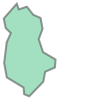

In [37]:
# Hello Albania
world.loc[2,'geometry']

Wow, that was cool.

A polygon is a loop of points connected by straight lines (e.g., triangle or rectangle). The more points we have, the closer the polygon can approximate non-linear shapes. So Albania's shape is defined by many points connected by lines.  

In [48]:
# Returns two arrays that hold the x and y coordinates of the points that define the polygon's exterior.
x, y = world.loc[2,'geometry'].exterior.coords.xy

# How many points?
print('Points in the exterior of Albania:', len(x))


Points in the exterior of Albania: 22


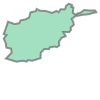

In [49]:
# Afghanistan is a more complicated shape
world.loc[0,'geometry']

In [50]:
# Returns two arrays that hold the x and y coordinates of the points that define the polygon's exterior.
x, y = world.loc[0, 'geometry'].exterior.coords.xy

# How many points?
print('Points in the exterior of Afghanistan:', len(x))

Points in the exterior of Afghanistan: 69


### 2. Ploting the map

Here is the code. Details in the cell below it. 

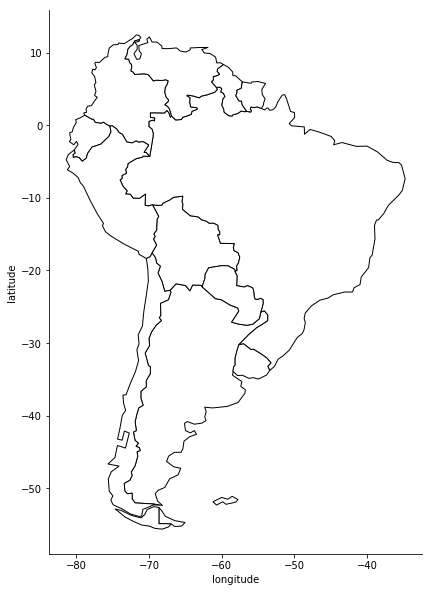

In [51]:
# Step 2: Plot the map

fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world[world['continent'] == 'South America'].plot(ax = gax, edgecolor='black',color='white')

gax.set_xlabel('longitude')  # By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()


### GeoDataFrame plots
Nice one! That was easy, and now we have a map. 

Note the different syntax for plot. We have been using the `plot()` method of matplotlib axes objects, so we usually called 
```python
gax.plot(x, y)
```
which plotted x against y on the axis gax. 

With a GeoDataFrame, we invoke the `plot()` method of a GeoDataFrame object with
```
gdf.plot(ax = gax)
```
which will plot the geometry data in gdf on the axis gax.  This is similar to the syntax that seaborn uses. 

### Other options
Notice that lots of the regular matplotlib options still work. I can still turn of the top and right spines (do I want to?) and I can add x and y axes labels. The parameter 'edgecolor' sets the line colors, etc. 

It looks like I didn't put a title on my plot. Poor form. Let's fix it when we add the cities. 

### 3. Plot the cities on the map

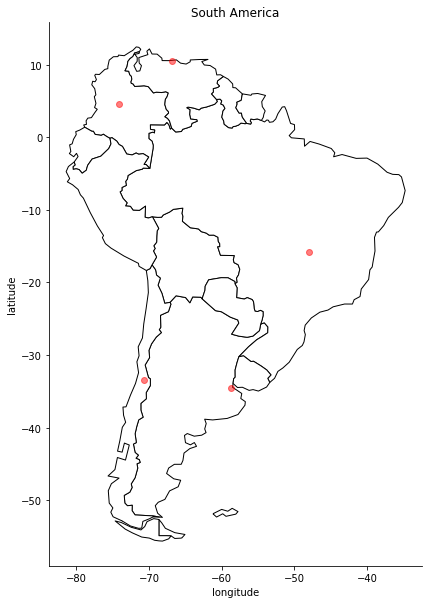

In [54]:
# Step 3: plot the cities onto the map
# We mostly use the code from before --- we still want the country borders ploted --- and we add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well, South America.
world[world['continent'] == 'South America'].plot(ax = gax, edgecolor='black',color='white')

# This plot the cities. It's the same sytax, but we are plotting from a different GeoDataFrame. I want the 
# cities as pale red dots. 
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')  
gax.set_ylabel('latitude')
gax.set_title('South America')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

### Label the points

Sweet. What else might we want here? How about some labels next to the dots? 

Each label is a `text()` call. Let's automate this. Here is the code, we describe it below. 

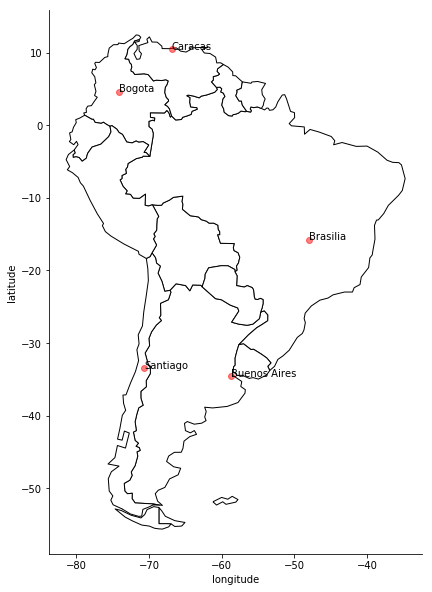

In [56]:
# Step 3: plot the cities onto the map
# We mostly use the code from before --- we still want the country borders ploted --- and we add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well, South America.
world[world['continent'] == 'South America'].plot(ax = gax, edgecolor='black',color='white')

# This plot the cities. It's the same sytax, but we are plotting from a different GeoDataFrame. I want the 
# cities as pale red dots. 
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')  
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# Label the cities
for x, y, label in zip(gdf['Coordinates'].x, gdf['Coordinates'].y, gdf['City']):
    gax.text(x, y, label)

plt.show()

### Adding labels to points
That took more work than I expected. Let's talk through that code. The first bit of code is 
```python
for x, y, label in zip(gdf['Coordinates'].x, gdf['Coordinates'].y, gdf['City']):
```
1. `for` is looping over the rows of the GeoDataFrame
2. `gdf['Coordinates'].x, gdf['Coordinates'].y, gdf['City']` takes the x part of the coordinate, the y part of the coordinate and the name of the city for the row being looped over.
3. `zip()` combines the x-coord, the y-coord, and the name together
4. `x, y, label` will hold the three values. 

So, for each row, the `for` loops over, x is the x-coord, y is the y-coord, and label is the city name for city defined in that row. We use this data with `text()` to apply the label at point (x,y)
```python
gax.text(x , y, label)
```

### Improving the labels
The labels get the job done, but they are a bit ugly. In particular, they are sitting on top of the dot. 

We can use `annotate()` to fix this up. We have used `annotate()` before to add arrows connecting the text to a point. Here, we will use the ability to specify an offset of the text from the point. Here is the syntax
```python
gax.annotate(label, xy=(x,y), xytext=(3,3), textcoords='offset points')
```
The parameter 'xy' is the point we are referencing. The parameter 'xytext' hold the number of points to offset the text from the point. The argument 'offset points' tells annotate that the (3,3) tuple we passed to 'xytext' is full of points to offset the label from the text.  

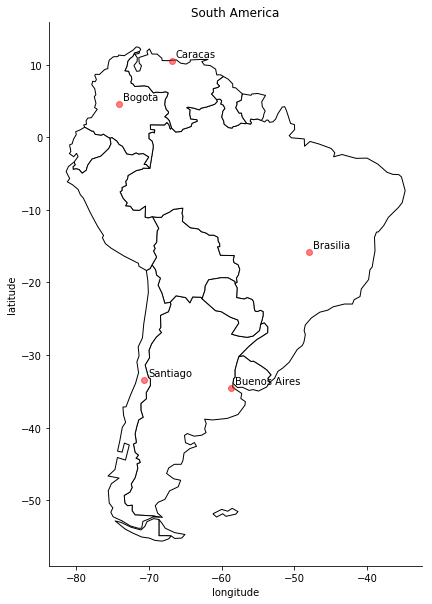

In [58]:
# Step 3: plot the cities onto the map
# We mostly use the code from before --- we still want the country borders ploted --- and we add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well, South America.
world[world['continent'] == 'South America'].plot(ax = gax, edgecolor='black',color='white')

# This plot the cities. It's the same sytax, but we are plotting from a different GeoDataFrame. I want the 
# cities as pale red dots. 
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')  
gax.set_ylabel('latitude')
gax.set_title('South America')

# Kill the spines...
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# ...or get rid of all the axis. Is it important to know the lat and long?
# plt.axis('off')


# Label the cities
for x, y, label in zip(gdf['Coordinates'].x, gdf['Coordinates'].y, gdf['City']):
    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

plt.show()

## Practice: Maps
On the first day of class, we looked at a map of votes by country in Wisconsin. While we agreed the map wasn't perfect, let's put together something similar. Along the way, we will learn where to find 'shape files' for U.S. states and counties. Shape files hold the polygons of areas. 

The steps:
1. Plot the state border
2. Plot the county borders
3. Merge data on votes with geographical data
4. Color the map

We have done a lot this already. Let's get to it. 

### 1. Plot the state border
Go to [https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html](https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html) and download the '5m' state border file. It's a zipped file. Put it in your cwd and uzip it. The file we need is 'cb_2017_us_state_5m.shp' where the 'shp' means 'shape'.

Read the shape file into a GeoDataFrame using `geopandas.read_file()` which works other 'read' methods from pandas. 

In [59]:
# Data from 
# https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html

states = geopandas.read_file('cb_2017_us_state_5m/cb_2017_us_state_5m.shp')
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131174431216,4592944701,"(POLYGON ((-88.04374299999999 30.517423, -88.0..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1478588231566,277723861311,"(POLYGON ((-150.242099 61.137835, -150.228774 ..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198661567,1027245114,"POLYGON ((-114.799683 32.593621, -114.809393 3..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268425964573,1178495763,"POLYGON ((-109.060253 38.599328, -109.059541 3..."
4,12,00294478,0400000US12,12,FL,Florida,00,138911437206,31398800291,"(POLYGON ((-80.751643 24.857254, -80.729063 24..."


In [61]:
# What do we have here...
print(type(states))
print(states.geometry.name)

<class 'geopandas.geodataframe.GeoDataFrame'>
geometry


This is already set up with the correct geometry and ready to go. 

Plot the Wisconsin border. 

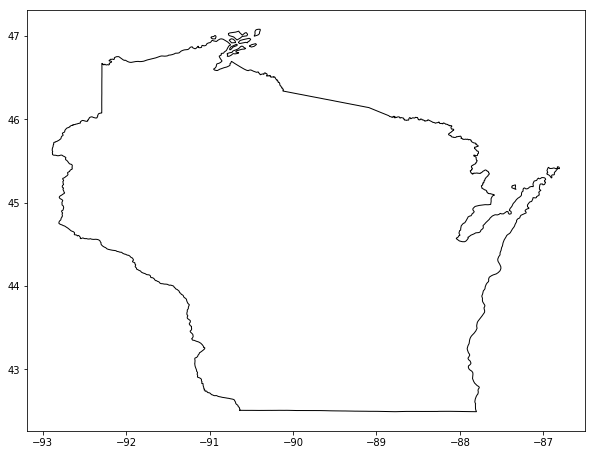

In [62]:
fig, gax = plt.subplots(figsize=(10,10))

# Only take the state named 'Wisconsin'
states[states['NAME'] == 'Wisconsin'].plot(ax = gax, edgecolor='black',color='white')

plt.show()

### 2. Plot the county borders

Let's add the county borders. To do so, we first need to get the shape files from https://www.census.gov/geo/maps-data/data/cbf/cbf_counties.html. Again, let's use the '5m' files.

Like before, read the file in to a GeoDataFrame. 

In [64]:
counties = geopandas.read_file('cb_2017_us_county_5m/cb_2017_us_county_5m.shp')
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475503964,387344307,"POLYGON ((-114.755618 36.087166, -114.753638 3..."
1,22,105,00559500,0500000US22105,22105,Tangipahoa,15,2049488093,136678798,"POLYGON ((-90.567171 30.824806, -90.567195 30...."
2,16,063,00395624,0500000US16063,16063,Lincoln,06,3111451190,11606076,"POLYGON ((-114.594605 43.198345, -114.374962 4..."
3,27,119,00659505,0500000US27119,27119,Polk,06,5105067510,69169913,"POLYGON ((-97.146672 48.171484, -97.1457019134..."
4,38,017,01034226,0500000US38017,38017,Cass,06,4571107601,7732062,"POLYGON ((-97.706034 47.239978, -97.4515119999..."


This GeoDataFrame has all the counties in it. We only want the ones from Wisconsin. The Wisconsin federal state code is 55. Keep only counties from Wisconsin. (A chance to practice our subsetting!) 


In [65]:
# Sconie's fips code is 55. Keep only those counties
wi_counties = counties[counties['STATEFP']=='55']   # the state codes came in as text. should look into this...

# Give it a quick sort so we can take a look
wi_counties = wi_counties.sort_values('NAME')       # is Adams county here?
wi_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
2736,55,001,01581060,0500000US55001,55001,Adams,06,1672140731,108432130,"POLYGON ((-90.02627199999999 44.089593, -90.00..."
2633,55,003,01581061,0500000US55003,55003,Ashland,06,2706535135,3230651989,"(POLYGON ((-90.46546499999999 47.002593, -90.4..."
1633,55,005,01581062,0500000US55005,55005,Barron,06,2234461780,70014121,"POLYGON ((-92.156757 45.294911, -92.1561519999..."
959,55,007,01581063,0500000US55007,55007,Bayfield,06,3827691502,1460289843,"(POLYGON ((-90.982101 46.985855, -90.949383 46..."
3119,55,009,01581064,0500000US55009,55009,Brown,06,1372929582,221812520,"POLYGON ((-88.252562 44.679813, -88.2426869999..."


Plot the counties onto the same map as the state border. You will probably want to resue the code from above. 

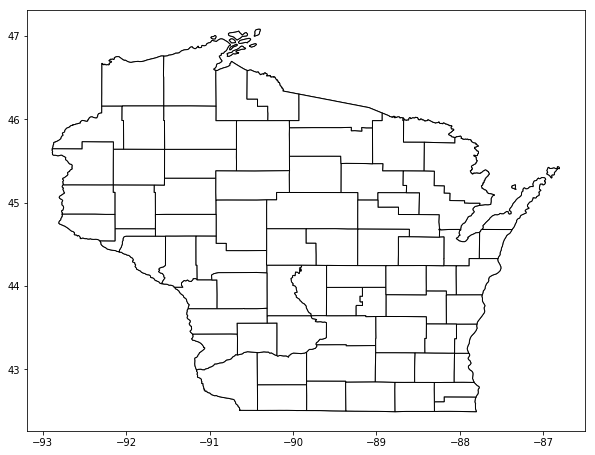

In [68]:
fig, gax = plt.subplots(figsize=(10,10))

# Plot the state outline
states[states['NAME'] == 'Wisconsin'].plot(ax = gax, edgecolor='black',color='white')

# Plot the counties
wi_counties.plot(ax=gax, edgecolor='black', color = 'white')

plt.show()

### 3. Get the vote totals and merge them 

Time to add the voter totals. I downloaded the results from https://elections.wi.gov/elections-voting/results/2016/fall-general. Go ahead and open up the file. It's a mess! 

I saved a cleaned up version of the file to 'results.csv' which we can use to save the hassle with cleaning the data. For fun, you should load the raw data and try beating it into shape. That's what you normally would have to do...and, it's fun.

Anyway, go ahead and load 'results.csv' to a DataFrame. Note, this is not a GeoDataFrame, this data doesn't have a geometery to it, it just has county names and vote counts. Use the `thousands=','` parameter to read_csv(). 

In [72]:
results = pd.read_csv('results.csv', thousands=',')
results.head()

,county,total,trump,clinton
0,ADAMS,10130,5966,3745
1,ASHLAND,8032,3303,4226
2,BARRON,22671,13614,7889
3,BAYFIELD,9612,4124,4953
4,BROWN,129011,67210,53382


The county names in the map data are in title case. The county names in the vote data are in all caps. We know how to fix this up. 

Convert the county names in the results data to title case. 

Strip the whitespace out of the county names in the results data, too. (Trust me, there is some extra space in some of the county names...)

In [73]:
# First letter cap only
results['county'] = results['county'].apply(str.title)

# Kill any leading or trailing whitespace
results['county'] = results['county'].apply(str.strip)

results.dtypes

county     object
total       int64
trump       int64
clinton     int64
dtype: object

Now strip any whitespace from the counties GeoDataFrame. 

Then, merge the county shapes and the results data. 

In [75]:
# Kill any leading or trailing whitespace
wi_counties['NAME']=wi_counties['NAME'].apply(str.strip)

# Merge the two data sets. 
res_w_states = pd.merge(left=wi_counties, right=results, left_on='NAME', right_on='county', how='inner')

res_w_states.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,county,total,trump,clinton
0,55,001,01581060,0500000US55001,55001,Adams,06,1672140731,108432130,"POLYGON ((-90.02627199999999 44.089593, -90.00...",Adams,10130,5966,3745
1,55,003,01581061,0500000US55003,55003,Ashland,06,2706535135,3230651989,"(POLYGON ((-90.46546499999999 47.002593, -90.4...",Ashland,8032,3303,4226
2,55,005,01581062,0500000US55005,55005,Barron,06,2234461780,70014121,"POLYGON ((-92.156757 45.294911, -92.1561519999...",Barron,22671,13614,7889
3,55,007,01581063,0500000US55007,55007,Bayfield,06,3827691502,1460289843,"(POLYGON ((-90.982101 46.985855, -90.949383 46...",Bayfield,9612,4124,4953
4,55,009,01581064,0500000US55009,55009,Brown,06,1372929582,221812520,"POLYGON ((-88.252562 44.679813, -88.2426869999...",Brown,129011,67210,53382


Create a variable called 'trump_share' that is the share of trump votes out of the total vote count.

In [76]:
res_w_states['trump_share'] =res_w_states['trump']/res_w_states['total']
res_w_states.head()


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,county,total,trump,clinton,trump_share
0,55,001,01581060,0500000US55001,55001,Adams,06,1672140731,108432130,"POLYGON ((-90.02627199999999 44.089593, -90.00...",Adams,10130,5966,3745,0.588944
1,55,003,01581061,0500000US55003,55003,Ashland,06,2706535135,3230651989,"(POLYGON ((-90.46546499999999 47.002593, -90.4...",Ashland,8032,3303,4226,0.411230
2,55,005,01581062,0500000US55005,55005,Barron,06,2234461780,70014121,"POLYGON ((-92.156757 45.294911, -92.1561519999...",Barron,22671,13614,7889,0.600503
3,55,007,01581063,0500000US55007,55007,Bayfield,06,3827691502,1460289843,"(POLYGON ((-90.982101 46.985855, -90.949383 46...",Bayfield,9612,4124,4953,0.429047
4,55,009,01581064,0500000US55009,55009,Brown,06,1372929582,221812520,"POLYGON ((-88.252562 44.679813, -88.2426869999...",Brown,129011,67210,53382,0.520963


### 4. Color the map

We are creating a chorolpleth map. This means that area are shaded in a color 'proportional' to the data that corresponds to that area. It's easy to do.

```python
gdf.plot(ax=gax, edgecolor='black', column='trump_share',  legend=True, cmap='Reds')

```

We only need to add a few extra arguments.

1. `column` is set to the column name of the data we want to be 'colored'
2. `cmap` determines the color scheme. I am using red colors.
3. `legend` turn on the legend


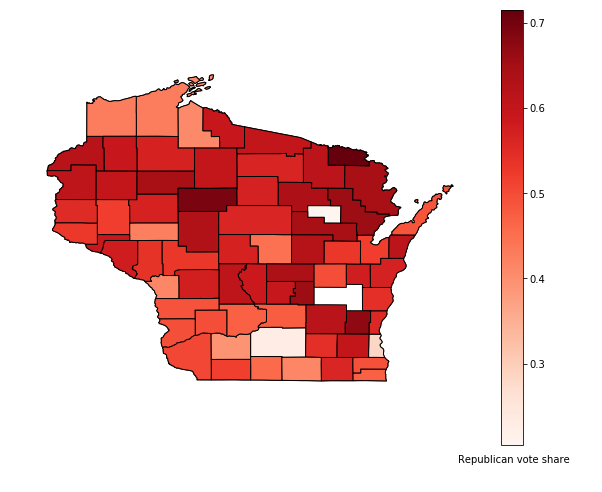

In [77]:
fig, gax = plt.subplots(figsize = (10,8))

# Plot the state
states[states['NAME'] == 'Wisconsin'].plot(ax = gax, edgecolor='black',color='white')

# Plot the counties and pass 'trump_share' as the data to color
res_w_states.plot(ax=gax, edgecolor='black', column='trump_share',  legend=True, cmap='Reds')

# Add some text to let people know what we are plotting
gax.annotate('Republican vote share',xy=(0.76, 0.06),  xycoords='figure fraction')

# I don't want the axis with long and lat
plt.axis('off')

plt.show()

Are we missing data for Dane county? It's white?

10. Print out, in a full sentence, the share of votes for Trump in Dane contry. Express the share with 3 decimal places.

In [78]:
res_w_states.set_index('county', inplace=True)
print('Trump votes, as a share of total votes, in Dane county is {0:.3f}.'.format(res_w_states.loc['Dane','trump_share']) )

Trump votes, as a share of total votes, in Dane county is 0.230.
